In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import joblib
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from datetime import timedelta
from sklearn.impute import SimpleImputer

pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore", UserWarning)

#np.seterr('raise')
#np.seterr(divide = 'ignore')
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
df2 = pd.read_csv("WIN_DATASET_normas_data11.csv", sep=";",encoding="utf-8")
df2

,Unnamed: 0,datetime,decisao,ampmedia,tp,sl,stdDev_buffer_0,stdDev_buffer_1,iTrades,dDifPrecoCum,dDifVolCum,dDifVolCum_div_iTrades,dVol,iATR_buffer_0,dDifLastAsk1,dDifLastBid1,dBid,dAsk,dMedDifVolCum,dAvgDifVolCum,dStdDifVolCum,dMaxDifVolCum,dMinDifVolCum,dAmpDifVolCum,dAssDifVolCum,dCurDifVolCum,dMedDifPrecoCum,dAvgDifPrecoCum,dStdDifPrecoCum,dMaxDifPrecoCum,dMinDifPrecoCum,dAmpDifPrecoCum,dAssDifPrecoCum,dCurDifPrecoCum,dMedTrades,dAvgTrades,dStdTrades,dMaxTrades,dMinTrades,dAmpTrades,dAssTrades,dCurTrades,dMedOfMedDifVolCum,dMedOfCurDifVolCum,dMedOfAssDifVolCum,dMedOfMedDifPrecoCum,dMedOfCurDifPrecoCum,dMedOfAssDifPrecoCum,dMedOfMedTrades,dMedOfCurTrades,dMedOfAssTrades,tat_iQtdeBuy,tat_iQtdeSell,tat_iQtdeBalance,tat_dSumBalance,tat_dCurtoseQC,tat_dCurtoseQV,tat_dPMedPondC,tat_dPMedPondV,dMedTaTQtdeBuy,dMedTaTQtdeSell,dMedTaTQtdeBalance,dMedTaTSumBalance,dMedTaTCurtoseQC,dMedTaTCurtoseQV,dMedTaTAssimetriaQC,dMedTaTAssimetriaQV,dMedTaTPMedPondC,dMedTaTPMedPondV,dAvgTaTQtdeBuy,dAvgTaTQtdeSell,dAvgTaTQtdeBalance,dAvgTaTSumBalance,dAvgTaTCurtoseQC,dAvgTaTCurtoseQV,dAvgTaTAssimetriaQC,dAvgTaTAssimetriaQV,dAvgTaTPMedPondC,dAvgTaTPMedPondV,dCurTaTQtdeBuy,dCurTaTQtdeSell,dCurTaTQtdeBalance,dCurTaTSumBalance,dCurTaTCurtoseQC,dCurTaTCurtoseQV,dCurTaTAssimetriaQC,dCurTaTAssimetriaQV,dCurTaTPMedPondC,dCurTaTPMedPondV,open,high,low,close,tick_volume,real_volume,dt,hour,minute,second,ratioPMedPondC,ratioPMedPondV,ampco,difPMP,difMedPMP,difCurQCQV,difAvgTaTCur,difAvgTaTAss,difAvgTaTPMP,difCurTaTCur,difCurTatAss,difCurTatPMP,ratioCurTaTQtdeSell,ratioCurTaTQtdeBuy,tat_iQtdeBalanceAcum,tat_dSumBalanceAcum,ratio_iQtdeSumAcum,norma_L1,norma_L2,norma_p,norma_L_inf
0,0,2023-09-18 09:03:02,0,104.8,20.0,20.0,74.258846,85.882752,305,15.0,1941.0,6.363934,1948.0,135.0,0.0,5.0,119920.0,119925.0,703.0,1077.266667,972.284545,3813.0,4.0,3809.0,1.555681,1.489214,0.0,0.166667,14.412838,30.0,-40.0,70.0,-0.123996,0.788607,133.5,171.100000,106.288595,531.0,1.0,530.0,1.487508,2.402306,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,568,262,306,872.0,19.962490,36.282976,119921.257996,119913.906542,144.0,152.5,-36.5,-87.5,18.796443,15.800422,4.026555,3.419496,119939.148478,119934.319775,211.400000,232.833333,-21.433333,-91.233333,29.529116,32.229801,4.399435,4.435122,119939.259872,119934.302228,10.219552,1.312894,2.369943,2.423861,1.813974,2.604386,0.151294,1.330071,-0.888282,-0.819711,119915.0,119930.0,119905.0,119925.0,832,1948,2023-09-18 09:03:02,9,3,2,1.083653,0.922805,10.0,7.351454,4.828703,-16.320486,-2.700685,-0.035687,4.957644,-0.790412,-1.178777,-0.068571,0.128469,7.783989,306.0,872.0,2.849673,1072.290663,881.375728,872.630432,872.000000
1,1,2023-09-18 09:03:04,0,104.8,20.0,20.0,74.258846,85.882752,89,0.0,300.0,3.370787,2248.0,135.0,0.0,5.0,119920.0,119925.0,703.0,1068.533333,978.230906,3813.0,4.0,3809.0,1.541525,1.446358,0.0,0.166667,14.412838,30.0,-40.0,70.0,-0.123996,0.788607,133.5,169.666667,107.120729,531.0,1.0,530.0,1.478531,2.325394,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,88,63,25,58.0,13.009342,38.063531,119922.724719,119917.666667,144.0,149.5,-32.0,-84.0,18.796443,15.800422,4.026555,3.419496,119939.148478,119934.319775,211.666667,229.233333,-17.566667,-81.933333,29.739228,31.725045,4.423001,4.415492,119939.239912,119934.276454,10.245481,1.264456,2.350904,2.422823,1.845996,2.819196,0.194360,1.481864,-0.893360,-0.825935,119915.0,119930.0,119905.0,119925.0,985,2248,2023-09-18 09:03:04,9,3,4,1.081634,0.924527,10.0,5.058052,4.828703,-25.054188,-1.985817,0.007510,4.963458,-0.973201,-1.287505,-0.067425,0.123416,8.102677,331.0,930.0,2.809668,1113.623996,937.538092,930.442287,930.000000
2,2,2023-09-18 09:03:06,0,104.8,20.0,20.0,73.641121,85.882752,125,-25.0,825.0,6.600000,3073.0,136.0,-5.0,0.0,119900.0,119905.0,703.0,1067.766667,978.418699,3813.0,4.0,3809.0,1.542777,1.447819,0.0,-0.833333,15.090722,30.0,-40.0,70.0,-0.071264,0.365479,133.5,169.666667,107.120729,531.0,1.0,530.0,1.478531,2.325394,0.0,0.000000,0.0

In [3]:
#df2 = df2.drop(0, axis=1)
#df2.columns = df2.iloc[0]
#df2 = df2[0:]
#df2 = df2.iloc[1:]
#df2.head()

# Dividindo em intervalos iguais entre os segundos

In [4]:
df2['datetime'] = pd.to_datetime(df2['datetime'])

def generate_miliseconds(_df):
    _gb_second = _df.groupby(pd.Grouper(key='datetime', axis=0, freq='S'))

    _groups_per_second = list(_gb_second.groups)
    _groups_per_second_sizes = list(_gb_second.size())

    _new_date_times_with_miliseconds = []

    for _index, (_second, _group_size) in enumerate(zip(_groups_per_second, _groups_per_second_sizes)):
        _next_second = _second + timedelta(seconds=1)
        if (_group_size > 0):
            _timestamp_list = pd.date_range(start=_second, end=_next_second - timedelta(milliseconds=1), periods=_group_size + 1).tolist()
            _new_date_times_with_miliseconds.extend(_timestamp_list)

    _new_date_times_with_miliseconds_df = pd.DataFrame(_new_date_times_with_miliseconds)

    _df['datetime'] = _new_date_times_with_miliseconds_df[0]

    return _df

df2 = generate_miliseconds(df2)
print(df2['datetime'].value_counts())

2023-09-18 09:03:02.000    1
2023-10-03 12:45:16.000    1
2023-10-03 12:45:14.000    1
2023-10-03 12:45:12.999    1
2023-10-03 12:45:12.000    1
                          ..
2023-09-25 15:20:08.999    1
2023-09-25 15:20:08.000    1
2023-09-25 15:20:06.999    1
2023-09-25 15:20:06.000    1
2023-10-11 09:42:24.000    1
Name: datetime, Length: 539879, dtype: int64


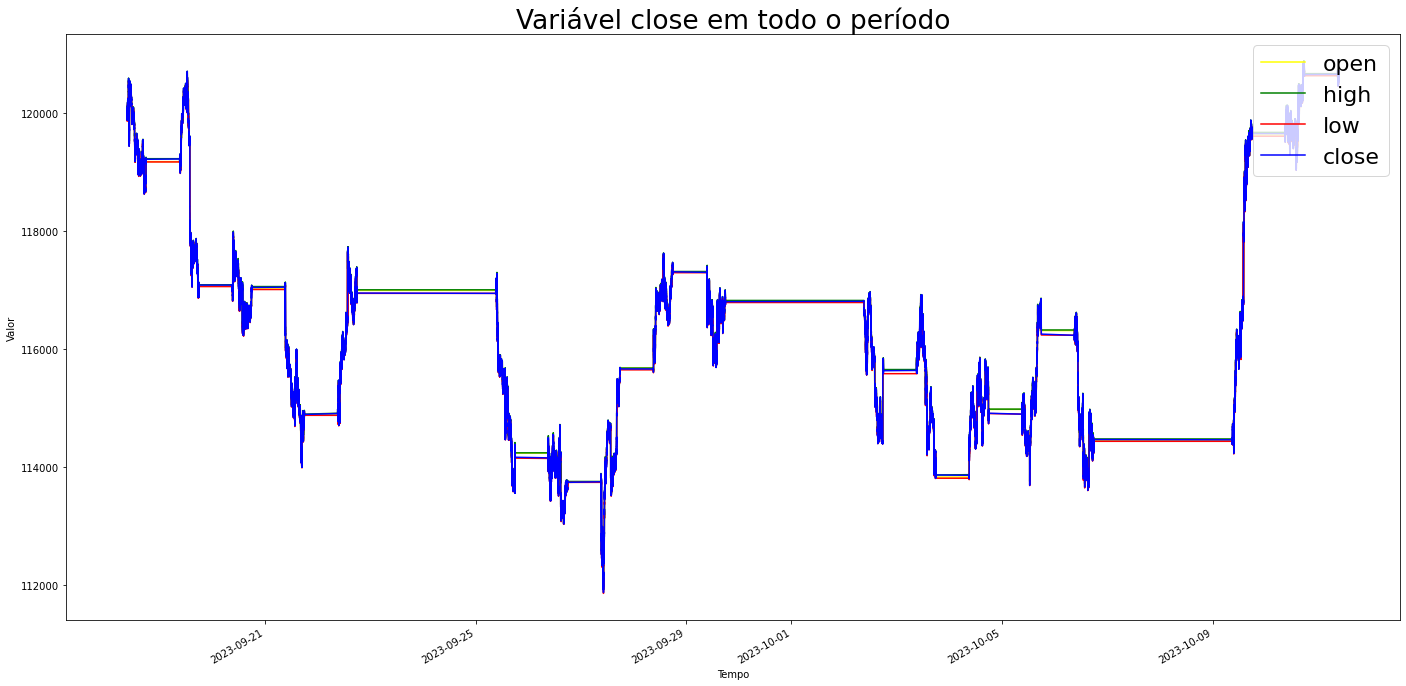

In [5]:
def plot_values_by_period(_df, _title, start=None, end=None):
    if start is not None and end is not None:
        _df_aux = _df[(_df['datetime'] >= start) & (_df['datetime'] < end)]
    else:
        _df_aux = _df.copy()

    if not pd.api.types.is_datetime64_any_dtype(_df_aux['datetime']):
        _df_aux['datetime'] = pd.to_datetime(_df_aux['datetime'])

    numeric_columns = ['open', 'high', 'low', 'close']
    _df_aux[numeric_columns] = _df_aux[numeric_columns].apply(pd.to_numeric, errors='coerce')
    _df_aux = _df_aux.dropna(subset=numeric_columns)

    _t = _df_aux['datetime']
    _open = _df_aux['open']
    _high = _df_aux['high']
    _low = _df_aux['low']
    _close = _df_aux['close']

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 22})
    ax.plot(_t, _open, color='yellow', label='open')
    ax.plot(_t, _high, color='green', label='high')
    ax.plot(_t, _low, color='red', label='low')
    ax.plot(_t, _close, color='blue', label='close')
    plt.title("%s" % (_title))
    plt.ylabel("Valor")
    plt.xlabel("Tempo")
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

plot_values_by_period(df2, 'Variável close em todo o período')

In [6]:
df2['datetime'] = df2['datetime'].apply(lambda x: pd.Timestamp(x))
df2.drop_duplicates(subset=None, keep='first', inplace=True)
df2.sort_index(inplace=True)
df2.fillna(0, inplace=True)

columns_to_exclude  = [
    'decisao',
    'ampmedia',
    'tp',
    'sl',
    'stdDev_buffer_1',
    'dDifVolCum_div_iTrades',
    'dDifLastAsk1',
    'dDifLastBid1',
    'dMedDifVolCum',
    'dMaxDifVolCum',
    'dMinDifVolCum',
    'dAmpDifVolCum',
    'dAssDifVolCum',
    'dCurDifVolCum',
    'dMedDifPrecoCum',
    'dStdDifPrecoCum',
    'dMaxDifPrecoCum',
    'dAmpDifPrecoCum',
    'dAssDifPrecoCum',
    'dCurDifPrecoCum',
    'dMedTrades',
    'dMaxTrades',
    'dAmpTrades',
    'dAssTrades',
    'dCurTrades',
    'dMedOfMedDifVolCum',
    'dMedOfCurDifPrecoCum',
    'dMedOfMedTrades',
    'dMedOfCurTrades',
    'dMedOfAssTrades',
    'tat_dCurtoseQC',
    'tat_dCurtoseQV',
    'dMedTaTQtdeBuy',
    'dMedTaTQtdeSell',
    'dMedTaTQtdeBalance',
    'dMedTaTSumBalance',
    'dMedTaTCurtoseQC',
    'dMedTaTCurtoseQV',
    'dMedTaTAssimetriaQC',
    'dMedTaTAssimetriaQV',
    'dCurTaTQtdeBuy',
    'dCurTaTQtdeSell',
    'dCurTaTQtdeBalance',
    'dCurTaTSumBalance',
    'dCurTaTCurtoseQC',
    'dCurTaTCurtoseQV',
    'dCurTaTAssimetriaQC',
    'dCurTaTAssimetriaQV',
    'open',
    'low',
    'dt',
    'hour',
    'minute',
    'second',
    'ratioPMedPondC',
    'difPMP',
    'difMedPMP',
    'difCurQCQV',
    'difAvgTaTPMP',
    'difCurTaTCur',
    'difCurTatAss',
    'difCurTatPMP',
    'ratioCurTaTQtdeSell',
    'ratioCurTaTQtdeBuy',
    ]

operations_datetime = [
    pd.to_datetime('2023-09-18 09:37:06'),
    pd.to_datetime('2023-09-19 09:53:46'),
    pd.to_datetime('2023-09-20 10:02:04'),
]

RANGE = {
    'hours':   0,
    'minutes': 0,
    'seconds': 30,
}

df2['dt'] = df2['dt'].apply(lambda x: pd.Timestamp(x))
operations_dataframe = []
for operation in operations_datetime:
    start = operation - pd.Timedelta(hours=RANGE['hours'], minutes=RANGE['minutes'], seconds=RANGE['seconds'])
    end = operation + pd.Timedelta(hours=RANGE['hours'], minutes=RANGE['minutes'], seconds=RANGE['seconds'])
    operations_dataframe.append(df2[(df2['dt'] >= start) & (df2['dt'] <= end)])
    
columns_to_plot = operations_dataframe[0].columns.drop(columns_to_exclude)
df3 = df2.loc[:, columns_to_plot].copy()
df3

,Unnamed: 0,datetime,stdDev_buffer_0,iTrades,dDifPrecoCum,dDifVolCum,dVol,iATR_buffer_0,dBid,dAsk,dAvgDifVolCum,dStdDifVolCum,dAvgDifPrecoCum,dMinDifPrecoCum,dAvgTrades,dStdTrades,dMinTrades,dMedOfCurDifVolCum,dMedOfAssDifVolCum,dMedOfMedDifPrecoCum,dMedOfAssDifPrecoCum,tat_iQtdeBuy,tat_iQtdeSell,tat_iQtdeBalance,tat_dSumBalance,tat_dPMedPondC,tat_dPMedPondV,dMedTaTPMedPondC,dMedTaTPMedPondV,dAvgTaTQtdeBuy,dAvgTaTQtdeSell,dAvgTaTQtdeBalance,dAvgTaTSumBalance,dAvgTaTCurtoseQC,dAvgTaTCurtoseQV,dAvgTaTAssimetriaQC,dAvgTaTAssimetriaQV,dAvgTaTPMedPondC,dAvgTaTPMedPondV,dCurTaTPMedPondC,dCurTaTPMedPondV,high,close,tick_volume,real_volume,ratioPMedPondV,ampco,difAvgTaTCur,difAvgTaTAss,tat_iQtdeBalanceAcum,tat_dSumBalanceAcum,ratio_iQtdeSumAcum,norma_L1,norma_L2,norma_p,norma_L_inf
0,0,2023-09-18 09:03:02.000,74.258846,305,15.0,1941.0,1948.0,135.0,119920.0,119925.0,1077.266667,972.284545,0.166667,-40.0,171.100000,106.288595,1.0,0.000000,0.000000,0.0,0.000000,568,262,306,872.0,119921.257996,119913.906542,119939.148478,119934.319775,211.400000,232.833333,-21.433333,-91.233333,29.529116,32.229801,4.399435,4.435122,119939.259872,119934.302228,-0.888282,-0.819711,119930.0,119925.0,832,1948,0.922805,10.0,-2.700685,-0.035687,306.0,872.0,2.849673,1072.290663,881.375728,872.630432,872.000000
1,1,2023-09-18 09:03:02.999,74.258846,89,0.0,300.0,2248.0,135.0,119920.0,119925.0,1068.533333,978.230906,0.166667,-40.0,169.666667,107.120729,1.0,0.000000,0.000000,0.0,0.000000,88,63,25,58.0,119922.724719,119917.666667,119939.148478,119934.319775,211.666667,229.233333,-17.566667,-81.933333,29.739228,31.725045,4.423001,4.415492,119939.239912,119934.276454,-0.893360,-0.825935,119930.0,119925.0,985,2248,0.924527,10.0,-1.985817,0.007510,331.0,930.0,2.809668,1113.623996,937.538092,930.442287,930.000000
2,2,2023-09-18 09:03:04.000,73.641121,125,-25.0,825.0,3073.0,136.0,119900.0,119905.0,1067.766667,978.418699,-0.833333,-40.0,169.666667,107.120729,1.0,0.000000,0.000000,0.0,0.000000,99,254,-155,-280.0,119908.552632,119909.963370,119939.148478,119934.319775,210.966667,232.633333,-21.666667,-85.400000,28.384715,29.293636,4.292218,4.271673,119938.648983,119933.947521,-0.991397,-0.899733,119930.0,119900.0,1341,3073,0.907541,-15.0,-0.908921,0.020545,176.0,650.0,3.693182,841.137931,661.300695,650.965595,650.000000
3,3,2023-09-18 09:03:04.999,73.261236,206,-15.0,1448.0,4521.0,139.0,119885.0,119890.0,1104.300000,971.206259,-1.166667,-40.0,173.466667,106.289369,1.0,0.000000,0.000000,0.0,0.000000,121,312,-191,-418.0,119891.713147,119893.092391,119939.148478,119934.319775,212.933333,239.333333,-26.400000,-94.866667,28.475389,29.372100,4.300743,4.280555,119937.614345,119933.145251,-0.848911,-0.927534,119930.0,119885.0,1781,4521,1.092617,-30.0,-0.896712,0.020187,-321.0,-640.0,1.993769,845.297715,652.956848,641.189904,640.000000
4,4,2023-09-18 09:03:06.000,73.361162,195,10.0,1429.0,5950.0,139.0,119895.0,119900.0,1138.333333,963.825973,-0.833333,-40.0,176.633333,105.436853,1.0,0.000000,0.000000,0.0,0.000000,174,246,-72,-395.0,119895.843254,119890.561735,119939.148478,119934.319775,215.500000,243.233333,-27.733333,-105.333333,29.745433,29.343544,4.407891,4.277022,119936.731625,119932.271118,-0.933667,-0.975189,119930.0,119895.0,2211,5950,1.044472,-20.0,0.401889,0.130869,-418.0,-1093.0,2.614833,1313.646948,1101.893600,1093.518717,1093.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539874,539874,2023-10-11 09:42:20.000,13.945947,36,0.0,155.0,10505.0,52.0,120555.0,120560.0,420.733333,257.227383,0.166667,-10.0,55.400000,19.025573,13.0,2.815548,1.836752,0.0,-0.350768,26,24,2,53.0,120561.355140,120557.407407,120559.579208,120555.000000,45.433333,46.866667,-1.433333,-11.566667,11.748148,10.350530,3.059985,2.726537,120561.970966,120557.706280,-0.720132,-0.749227,120580.0,120560.0,2385,10505,1.040403,5.0

In [7]:
#df2 = df2.drop('ampmedia', axis=1); df2 = df2.drop('dMedOfMedDifVolCum', axis=1); df2 = df2.drop('dMedOfCurDifVolCum', axis=1)
#df2 = df2.drop('tp', axis=1); df2 = df2.drop('dMedOfAssDifVolCum', axis=1); df2 = df2.drop('dMedOfMedDifPrecoCum', axis=1)
#df2 = df2.drop('sl', axis=1); df2 = df2.drop('dMedOfCurDifPrecoCum', axis=1); df2 = df2.drop('dMedOfAssDifPrecoCum', axis=1)
#df2 = df2.drop('dMinDifVolCum', axis=1)
#df2 = df2.drop('dAmpDifVolCum', axis=1)
#df2 = df2.drop('dMedDifPrecoCum', axis=1)
#df2 = df2.drop('dMinDifPrecoCum', axis=1)
#df2 = df2.drop('dMaxDifPrecoCum', axis=1)
#df2 = df2.drop('dMedTrades', axis=1)
#df2 = df2.drop('dMaxTrades', axis=1)
#df2 = df2.drop('dMinTrades', axis=1)
#df2 = df2.drop('dAmpTrades', axis=1)
#df2 = df2.drop('dMedOfMedTrades', axis=1)
#df2 = df2.drop('dMedOfAssTrades', axis=1)
#df2 = df2.drop('dMedOfCurTrades', axis=1)

In [8]:
df4 = pd.read_csv("win_dataset_data11.csv", sep=";",encoding="utf-8")
df4

,Unnamed: 0,dt,year,month,day,hour,minute,second,TP,SL,amp,ampTH,ampTL,pFreq,pPercentil,pTargetSumBalanceAcumBuy,pTargetSumBalanceAcumSell,pRatio,pRatioSum,spread_latency,bManagingModel,ampmedia,stdDev_buffer_0,stdDev_buffer_1,dDifVolCum,dVol,iATR_buffer_0,dStdDifVolCum,dMedDifVolCum,iTrades,dAvgTrades,tat_dSumBalanceAcum,tat_iQtdeBalanceAcum,ratio_iQtdeSumAcum,dAvgTaTSumBalance,dMedTaTSumBalance,dMedDifPrecoCum,dAssDifPrecoCum,dAvgTaTQtdeBalance,dMedOfCurDifPrecoCum,op,precoTrade,precoMedian10,precoMedian5,bStop,variable,rv1,rv2,tat_dSumBalanceAcum_goal,tat_iQtdeBalanceAcum_goal,ratio_iQtdeSumAcum_goal,dAvgTaTSumBalance_goal,dMedTaTSumBalance_goal,dMedDifPrecoCum_goal,dAssDifPrecoCum_goal,dAvgTaTQtdeBalance_goal,dMedOfCurDifPrecoCum_goal,dtclose,difTime,precoClose,contracts,result,liq_reais,obs,target
0,0,2023-09-18 09:37:06,2023,9,18,9,37,6,50,60,50,10.0,25.0,0.8,80,6108.0,-6200.0,10,2,0,False,35.2,16.827920,10.192250,13062.0,17311.0,42.0,2374.463957,414.0,1197,133.300000,10860.0,2933.0,3.702693,567.933333,67.0,2.5,-0.147624,153.866667,-0.631570,vd,120185.0,120165.0,120170.0,False,NaN,0,0,-6600.0,-2581.0,2.557148,-441.766667,-172.0,-5.0,0.098325,-147.666667,-0.640758,2023-09-18 10:01:08,1442,120135.0,2,100,20.0,win,-1
1,1,2023-09-18 10:14:46,2023,9,18,10,14,46,60,90,175,5.0,90.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,33.034909,31.977926,9165.0,35202.0,90.0,1756.056195,852.0,1174,194.933333,10857.0,3603.0,3.013322,545.266667,79.5,5.0,0.485261,189.266667,-0.907055,vd,120115.0,120052.5,120065.0,False,NaN,0,0,4622.0,1526.0,3.028834,403.933333,227.0,0.0,0.069694,132.866667,-1.203419,2023-09-18 10:16:32,106,120205.0,2,-180,-36.0,loss,1
2,2,2023-09-18 10:16:42,2023,9,18,10,16,42,60,90,225,5.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,76.418907,64.389470,5350.0,51268.0,85.0,1998.371528,1594.0,653,299.766667,6702.0,2061.0,3.251820,887.833333,421.0,2.5,0.150161,260.533333,-1.203419,vd,120235.0,120200.0,120220.0,False,NaN,0,0,5775.0,1801.0,3.206552,295.266667,14.5,2.5,-0.339036,84.966667,0.638067,2023-09-18 10:19:16,154,120325.0,2,-180,-36.0,loss,1
3,3,2023-09-19 09:35:50,2023,9,19,9,35,50,60,90,175,70.0,0.0,0.8,80,6108.0,-6200.0,10,2,0,False,60.8,45.813583,51.356767,3558.0,50850.0,75.0,1586.428726,1339.5,507,279.366667,-7000.0,-2099.0,3.334921,-640.500000,-275.0,-5.0,0.818719,-207.400000,0.647019,cp,119380.0,119407.5,119395.0,False,NaN,0,0,6338.0,1938.0,3.270382,-181.333333,-132.0,0.0,1.558216,-44.166667,0.661355,2023-09-19 09:36:14,24,119440.0,2,120,24.0,win,1
4,4,2023-09-19 09:53:46,2023,9,19,9,53,46,60,90,90,10.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,34.0,25.562229,15.353617,5963.0,39536.0,53.0,1765.118750,826.0,874,205.733333,7148.0,2472.0,2.891586,736.233333,268.0,0.0,-0.113547,233.500000,-0.677472,vd,119520.0,119487.5,119510.0,False,NaN,0,0,-3103.0,-1223.0,2.537204,559.566667,476.5,0.0,-0.795481,178.966667,-0.458825,2023-09-19 09:54:10,24,119460.0,2,120,24.0,win,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,2023-11-07 10:13:02,2023,11,7,10,13,2,60,90,250,30.0,0.0,0.8,80,6108.0,-6200.0,10,2,0,False,72.4,39.048735,59.361756,7794.0,7818.0,83.0,1361.588011,759.5,611,147.233333,-10146.0,-3392.0,2.991156,-313.100000,-82.0,0.0,0.032590,-115.466667,0.371763,cp,119490.0,119560.0,119525.0,False,NaN,0,0,1491.0,196.0,7.607143,-69.433333,-41.0,0.0,0.651835,-9.600000,-0.395391,2023-11-07 10:15:14,132,119550.0,2,120,24.0,win,1
462,462,2023-11-07 10:19:08,2023,11,7,10,19,8,60,90,220,65.0,5.0,0.8,80,6108.0,-6200.0,10,2,0,False,60.8,47.548502,70.349747,5782.0,11804.0,78.0,1377.884653,906.5,701,199.900000,-8957.0,-3240.0,2.764506,-569.900000,-146.5,-2.5,-0.251689,-189.266667,0.066110,cp,119620.0,119672.5,119675.0,False,NaN,0,0,-7180.0,-2482.0,2.892828,-496.333333,-162.5,-5.0,-0.257129,-156.833333,0.588504,2023-11-07 

In [9]:
df4['dt'] = df4['dt'].apply(lambda x: pd.Timestamp(x))
df4 = df4.set_index(df4.columns[0])
df4.drop_duplicates(subset=None, keep='first', inplace=True)
df4.sort_index(inplace=True)
df4.fillna(0, inplace=True)
df4.head()

,dt,year,month,day,hour,minute,second,TP,SL,amp,ampTH,ampTL,pFreq,pPercentil,pTargetSumBalanceAcumBuy,pTargetSumBalanceAcumSell,pRatio,pRatioSum,spread_latency,bManagingModel,ampmedia,stdDev_buffer_0,stdDev_buffer_1,dDifVolCum,dVol,iATR_buffer_0,dStdDifVolCum,dMedDifVolCum,iTrades,dAvgTrades,tat_dSumBalanceAcum,tat_iQtdeBalanceAcum,ratio_iQtdeSumAcum,dAvgTaTSumBalance,dMedTaTSumBalance,dMedDifPrecoCum,dAssDifPrecoCum,dAvgTaTQtdeBalance,dMedOfCurDifPrecoCum,op,precoTrade,precoMedian10,precoMedian5,bStop,variable,rv1,rv2,tat_dSumBalanceAcum_goal,tat_iQtdeBalanceAcum_goal,ratio_iQtdeSumAcum_goal,dAvgTaTSumBalance_goal,dMedTaTSumBalance_goal,dMedDifPrecoCum_goal,dAssDifPrecoCum_goal,dAvgTaTQtdeBalance_goal,dMedOfCurDifPrecoCum_goal,dtclose,difTime,precoClose,contracts,result,liq_reais,obs,target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2023-09-18 09:37:06,2023,9,18,9,37,6,50,60,50,10.0,25.0,0.8,80,6108.0,-6200.0,10,2,0,False,35.2,16.827920,10.192250,13062.0,17311.0,42.0,2374.463957,414.0,1197,133.300000,10860.0,2933.0,3.702693,567.933333,67.0,2.5,-0.147624,153.866667,-0.631570,vd,120185.0,120165.0,120170.0,False,0.0,0,0,-6600.0,-2581.0,2.557148,-441.766667,-172.0,-5.0,0.098325,-147.666667,-0.640758,2023-09-18 10:01:08,1442,120135.0,2,100,20.0,win,-1
1,2023-09-18 10:14:46,2023,9,18,10,14,46,60,90,175,5.0,90.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,33.034909,31.977926,9165.0,35202.0,90.0,1756.056195,852.0,1174,194.933333,10857.0,3603.0,3.013322,545.266667,79.5,5.0,0.485261,189.266667,-0.907055,vd,120115.0,120052.5,120065.0,False,0.0,0,0,4622.0,1526.0,3.028834,403.933333,227.0,0.0,0.069694,132.866667,-1.203419,2023-09-18 10:16:32,106,120205.0,2,-180,-36.0,loss,1
2,2023-09-18 10:16:42,2023,9,18,10,16,42,60,90,225,5.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,76.418907,64.389470,5350.0,51268.0,85.0,1998.371528,1594.0,653,299.766667,6702.0,2061.0,3.251820,887.833333,421.0,2.5,0.150161,260.533333,-1.203419,vd,120235.0,120200.0,120220.0,False,0.0,0,0,5775.0,1801.0,3.206552,295.266667,14.5,2.5,-0.339036,84.966667,0.638067,2023-09-18 10:19:16,154,120325.0,2,-180,-36.0,loss,1
3,2023-09-19 09:35:50,2023,9,19,9,35,50,60,90,175,70.0,0.0,0.8,80,6108.0,-6200.0,10,2,0,False,60.8,45.813583,51.356767,3558.0,50850.0,75.0,1586.428726,1339.5,507,279.366667,-7000.0,-2099.0,3.334921,-640.500000,-275.0,-5.0,0.818719,-207.400000,0.647019,cp,119380.0,119407.5,119395.0,False,0.0,0,0,6338.0,1938.0,3.270382,-181.333333,-132.0,0.0,1.558216,-44.166667,0.661355,2023-09-19 09:36:14,24,119440.0,2,120,24.0,win,1
4,2023-09-19 09:53:46,2023,9,19,9,53,46,60,90,90,10.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,34.0,25.562229,15.353617,5963.0,39536.0,53.0,1765.118750,826.0,874,205.733333,7148.0,2472.0,2.891586,736.233333,268.0,0.0,-0.113547,233.500000,-0.677472,vd,119520.0,119487.5,119510.0,False,0.0,0,0,-3103.0,-1223.0,2.537204,559.566667,476.5,0.0,-0.795481,178.966667,-0.458825,2023-09-19 09:54:10,24,119460.0,2,120,24.0,win,-1


In [10]:
operations_of_interest = df4[(df4['op'] == 'vd') & (df4['obs'] == 'win')]
operations_of_interest

,dt,year,month,day,hour,minute,second,TP,SL,amp,ampTH,ampTL,pFreq,pPercentil,pTargetSumBalanceAcumBuy,pTargetSumBalanceAcumSell,pRatio,pRatioSum,spread_latency,bManagingModel,ampmedia,stdDev_buffer_0,stdDev_buffer_1,dDifVolCum,dVol,iATR_buffer_0,dStdDifVolCum,dMedDifVolCum,iTrades,dAvgTrades,tat_dSumBalanceAcum,tat_iQtdeBalanceAcum,ratio_iQtdeSumAcum,dAvgTaTSumBalance,dMedTaTSumBalance,dMedDifPrecoCum,dAssDifPrecoCum,dAvgTaTQtdeBalance,dMedOfCurDifPrecoCum,op,precoTrade,precoMedian10,precoMedian5,bStop,variable,rv1,rv2,tat_dSumBalanceAcum_goal,tat_iQtdeBalanceAcum_goal,ratio_iQtdeSumAcum_goal,dAvgTaTSumBalance_goal,dMedTaTSumBalance_goal,dMedDifPrecoCum_goal,dAssDifPrecoCum_goal,dAvgTaTQtdeBalance_goal,dMedOfCurDifPrecoCum_goal,dtclose,difTime,precoClose,contracts,result,liq_reais,obs,target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2023-09-18 09:37:06,2023,9,18,9,37,6,50,60,50,10.0,25.0,0.8,80,6108.0,-6200.0,10,2,0,False,35.2,16.827920,10.192250,13062.0,17311.0,42.0,2374.463957,414.0,1197,133.300000,10860.0,2933.0,3.702693,567.933333,67.0,2.5,-0.147624,153.866667,-0.631570,vd,120185.0,120165.0,120170.0,False,0.0,0,0,-6600.0,-2581.0,2.557148,-441.766667,-172.0,-5.0,0.098325,-147.666667,-0.640758,2023-09-18 10:01:08,1442,120135.0,2,100,20.0,win,-1
4,2023-09-19 09:53:46,2023,9,19,9,53,46,60,90,90,10.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,34.0,25.562229,15.353617,5963.0,39536.0,53.0,1765.118750,826.0,874,205.733333,7148.0,2472.0,2.891586,736.233333,268.0,0.0,-0.113547,233.500000,-0.677472,vd,119520.0,119487.5,119510.0,False,0.0,0,0,-3103.0,-1223.0,2.537204,559.566667,476.5,0.0,-0.795481,178.966667,-0.458825,2023-09-19 09:54:10,24,119460.0,2,120,24.0,win,-1
5,2023-09-19 10:04:52,2023,9,19,10,4,52,60,90,160,0.0,115.0,0.8,80,6108.0,-6200.0,10,2,0,False,70.8,44.404783,31.903856,7266.0,81969.0,89.0,2268.501412,1993.0,990,441.633333,8479.0,2886.0,2.937976,860.033333,376.0,5.0,-0.065198,334.200000,-0.479777,vd,119395.0,119347.5,119365.0,False,0.0,0,0,-9816.0,-2491.0,3.940586,101.433333,21.0,2.5,-0.686697,94.933333,-0.622687,2023-09-19 10:05:32,40,119335.0,2,120,24.0,win,-1
8,2023-09-19 10:26:40,2023,9,19,10,26,40,60,90,255,15.0,100.0,0.8,80,6108.0,-6200.0,10,2,0,False,74.8,95.133653,100.160527,7949.0,68837.0,103.0,3658.819259,1101.0,1245,338.633333,15164.0,3991.0,3.799549,909.700000,79.5,5.0,0.014298,257.966667,-0.231389,vd,119455.0,119410.0,119440.0,False,0.0,0,0,-9106.0,-2669.0,3.411765,734.666667,40.5,2.5,-0.709806,203.300000,-0.282148,2023-09-19 10:26:52,12,119395.0,2,120,24.0,win,-1
10,2023-09-19 10:37:44,2023,9,19,10,37,44,60,90,280,15.0,95.0,0.8,80,6108.0,-6200.0,10,2,0,False,94.0,63.276439,70.115683,6256.0,49060.0,111.0,1656.360615,1491.5,899,295.666667,8052.0,2625.0,3.067429,633.166667,235.0,7.5,-0.320744,199.433333,-1.315768,vd,119140.0,119095.0,119115.0,False,0.0,0,0,-4563.0,-1259.0,3.624305,28.766667,-81.0,0.0,-0.603014,24.166667,-0.474533,2023-09-19 10:41:38,234,119080.0,2,120,24.0,win,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2023-11-06 11:58:40,2023,11,6,11,58,40,60,90,100,0.0,105.0,0.8,80,6108.0,-6200.0,10,2,0,False,62.0,21.919222,7.972650,4065.0,31761.0,86.0,1347.001235,876.0,170,141.900000,7552.0,1536.0,4.916667,398.033333,33.5,5.0,-0.136834,86.633333,-0.538865,vd,119600.0,119575.0,119585.0,False,0.0,0,0,-9775.0,-2740.0,3.567518,-167.966667,8.0,0.0,-0.602047,-55.900000,-0.042867,2023-11-06 12:04:00,320,119540.0,2,120,24.0,win,-1
452,2023-11-06 12:46:56,2023,11,6,12,46,56,60,90,140,0.0,65.0,0.8,80,6108.0,-6200.0,10,2,0,False,48.0,41.157141,51.275261,7439.0,25093.0,65.0,1341.719496,512.5,439,99.466667,7328.0,1926.0,3.804777,278.900000,11.0,5.0,0.787143,81.766667,-0.519430,vd,119835.0,119792.5,119800.0,False,0.0,0,0,-2585.0,-1160.0,2.228448,-269.300000,-94.5,0.0,-

# Extração da importância das features do dataset maior

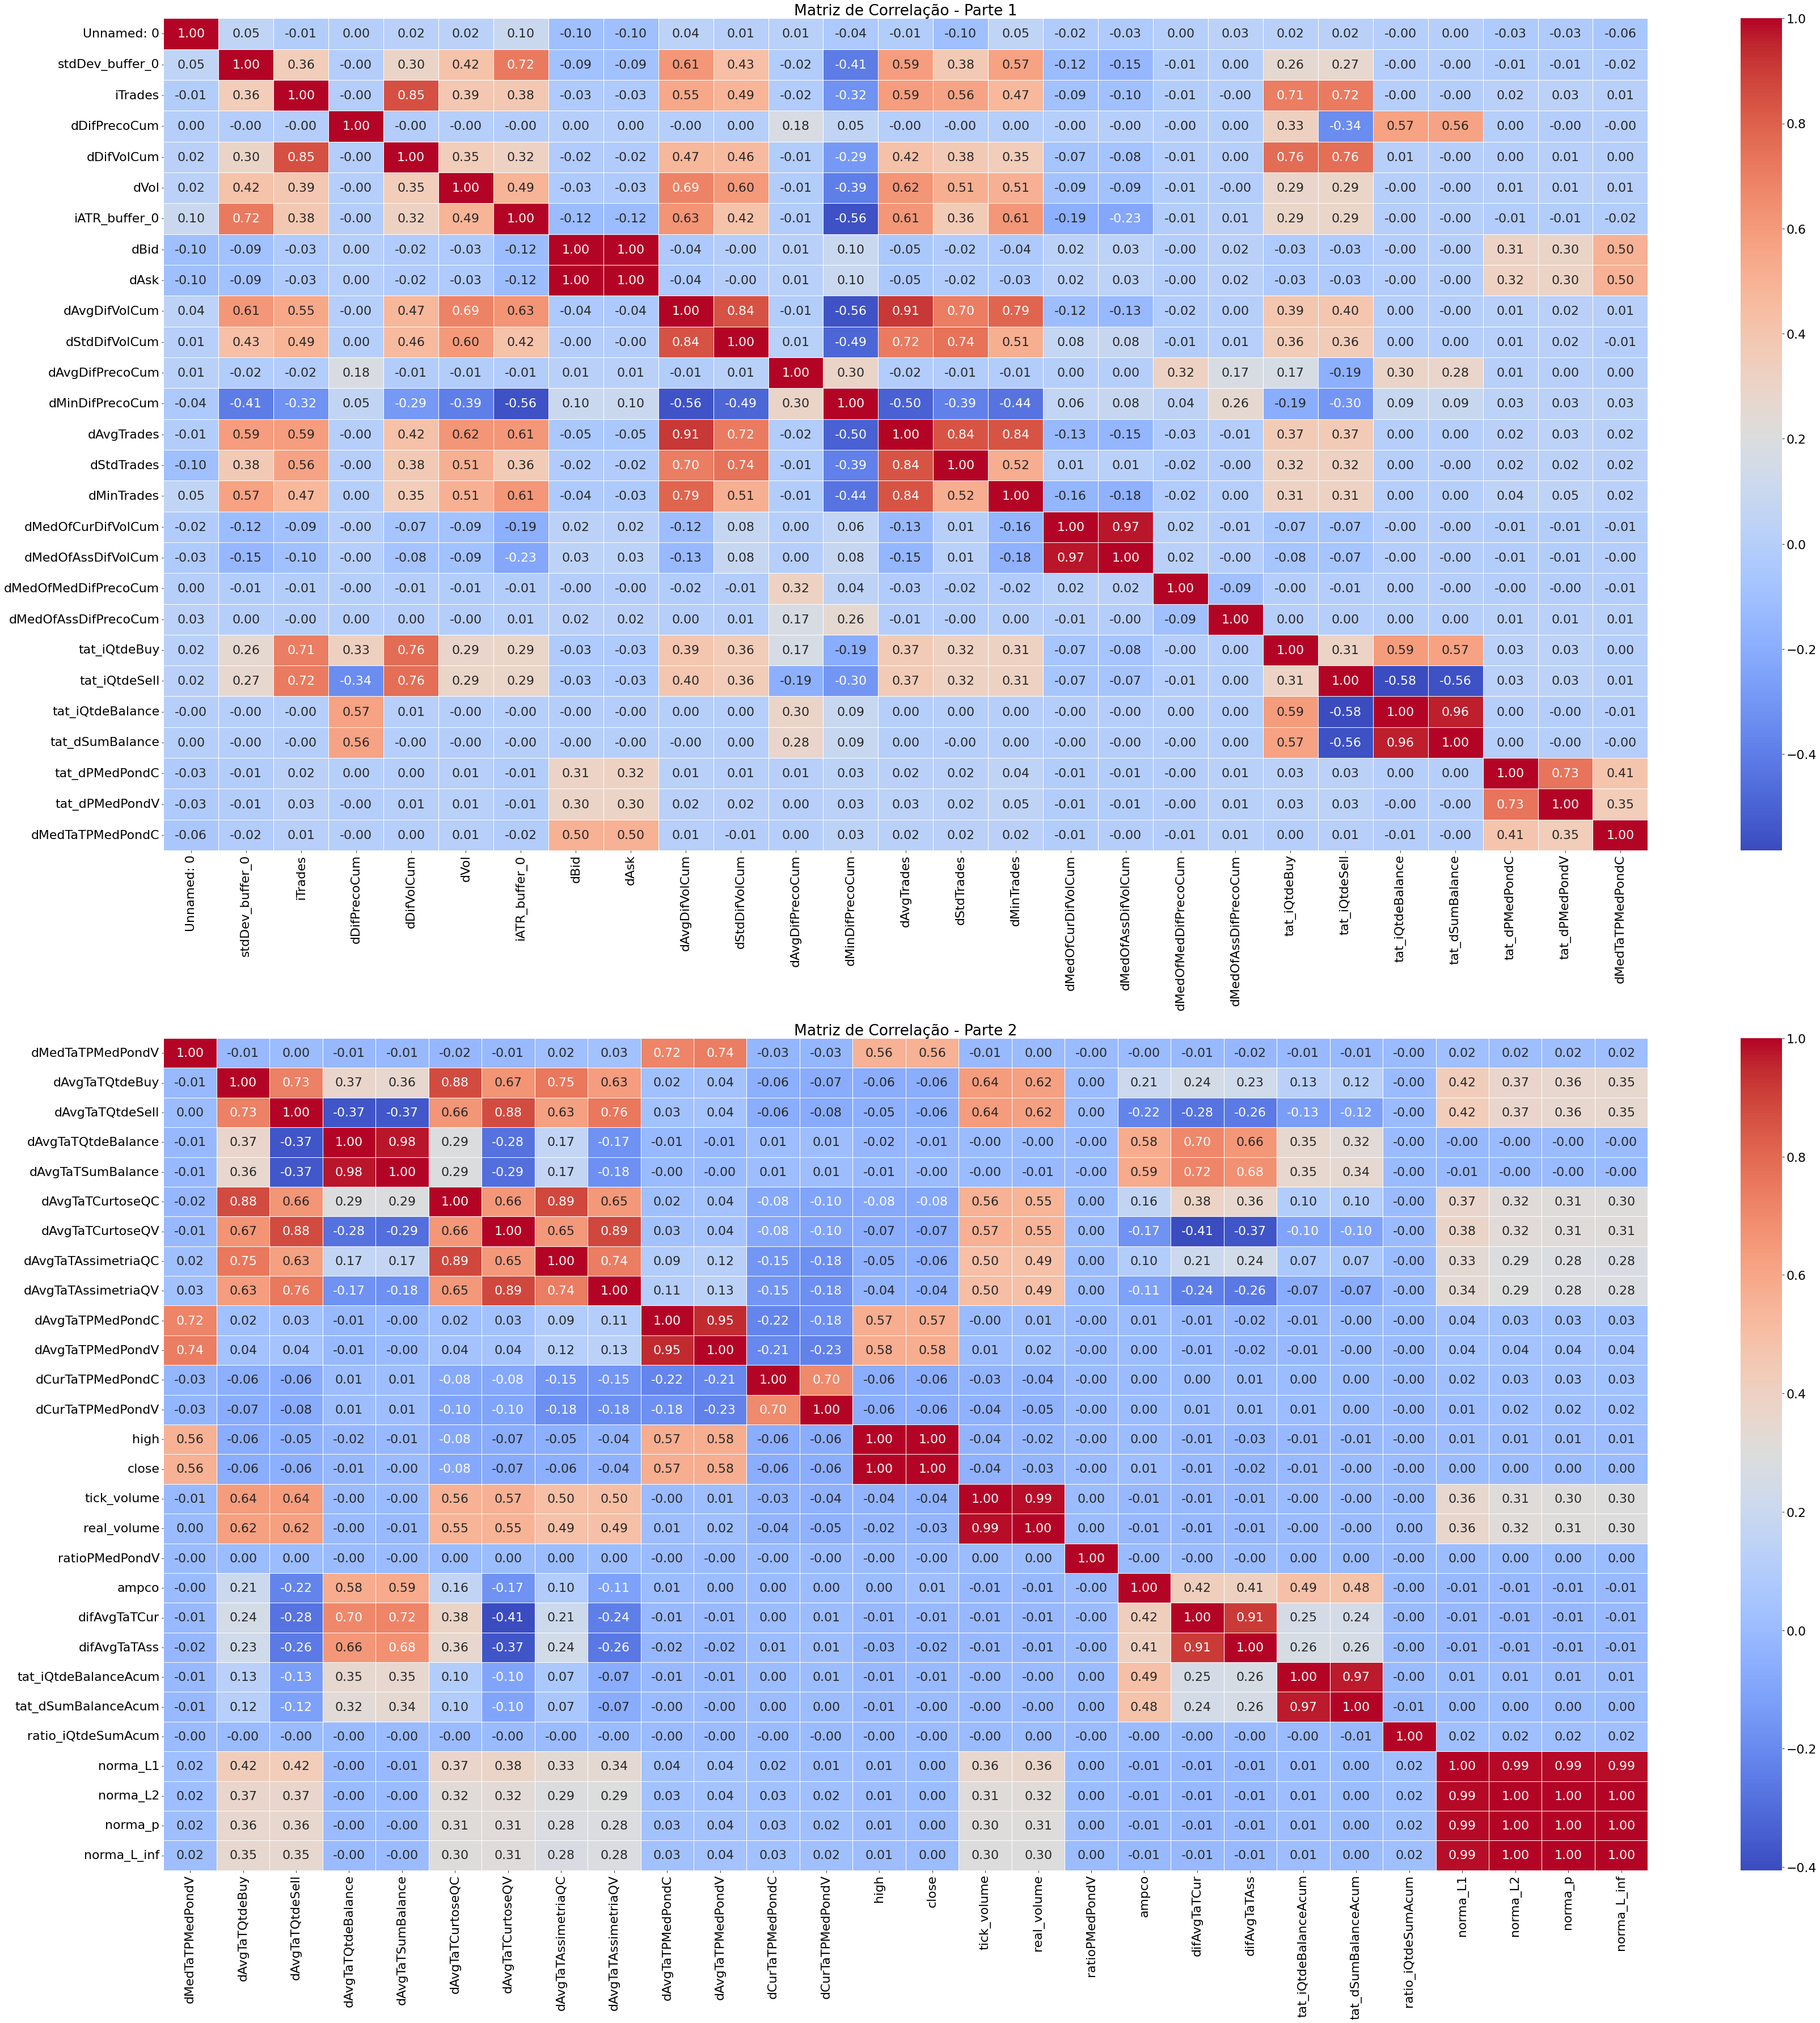

In [11]:
def plot_heatmap_split(correlacao):
    metade1 = correlacao.iloc[:len(correlacao)//2, :len(correlacao)//2]
    metade2 = correlacao.iloc[len(correlacao)//2:, len(correlacao)//2:]

    plt.figure(figsize=(50, 50))

    plt.subplot(2, 1, 1)
    sns.heatmap(metade1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação - Parte 1')

    plt.subplot(2, 1, 2)
    sns.heatmap(metade2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação - Parte 2')

    plt.tight_layout()
    plt.show()

matriz_correlacao = df3.corr()
plot_heatmap_split(matriz_correlacao)

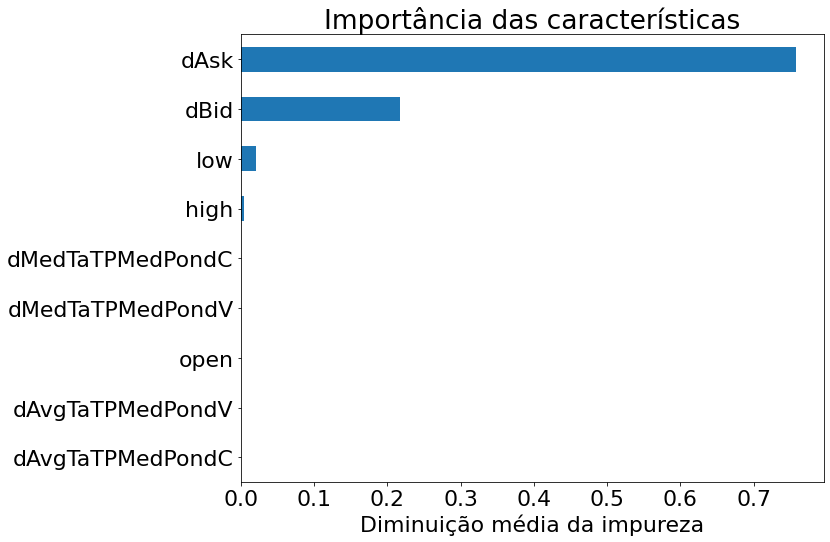

In [12]:
X_f = df2[['high', 'low', 'open', 'dBid', 'dAsk', 'dAvgTaTPMedPondV', 'dAvgTaTPMedPondC', 'dMedTaTPMedPondV', 'dMedTaTPMedPondC']]
y_f = df2['close']
X_f = X_f.astype(str)
label_encoder = LabelEncoder()
for column in X_f.columns:
    if X_f[column].dtype == 'object':
        X_f[column] = label_encoder.fit_transform(X_f[column])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=45)

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train_f, y_train_f)
feature_names = ['high', 'low', 'open', 'dBid', 'dAsk', 'dAvgTaTPMedPondV', 'dAvgTaTPMedPondC', 'dMedTaTPMedPondV', 'dMedTaTPMedPondC']

importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 8))
forest_importances_sorted.plot.barh(ax=ax)
ax.set_title("Importância das características")
ax.set_xlabel("Diminuição média da impureza")
fig.tight_layout()
plt.show()

In [13]:
colunas_para_excluir = ['dMedOfCurDifVolCum', 'dAsk', 'dAvgTrades', 'tat_iQtdeBalance', 
                        'dAvgTaTQtdeBalance', 'high', 'difAvgTaTCur', 'norma_L2', 'norma_L1']

df_final= df3.drop(columns=colunas_para_excluir)
df_final.columns

Index(['Unnamed: 0', 'datetime', 'stdDev_buffer_0', 'iTrades', 'dDifPrecoCum',
       'dDifVolCum', 'dVol', 'iATR_buffer_0', 'dBid', 'dAvgDifVolCum',
       'dStdDifVolCum', 'dAvgDifPrecoCum', 'dMinDifPrecoCum', 'dStdTrades',
       'dMinTrades', 'dMedOfAssDifVolCum', 'dMedOfMedDifPrecoCum',
       'dMedOfAssDifPrecoCum', 'tat_iQtdeBuy', 'tat_iQtdeSell',
       'tat_dSumBalance', 'tat_dPMedPondC', 'tat_dPMedPondV',
       'dMedTaTPMedPondC', 'dMedTaTPMedPondV', 'dAvgTaTQtdeBuy',
       'dAvgTaTQtdeSell', 'dAvgTaTSumBalance', 'dAvgTaTCurtoseQC',
       'dAvgTaTCurtoseQV', 'dAvgTaTAssimetriaQC', 'dAvgTaTAssimetriaQV',
       'dAvgTaTPMedPondC', 'dAvgTaTPMedPondV', 'dCurTaTPMedPondC',
       'dCurTaTPMedPondV', 'close', 'tick_volume', 'real_volume',
       'ratioPMedPondV', 'ampco', 'difAvgTaTAss', 'tat_iQtdeBalanceAcum',
       'tat_dSumBalanceAcum', 'ratio_iQtdeSumAcum', 'norma_p', 'norma_L_inf'],
      dtype='object')

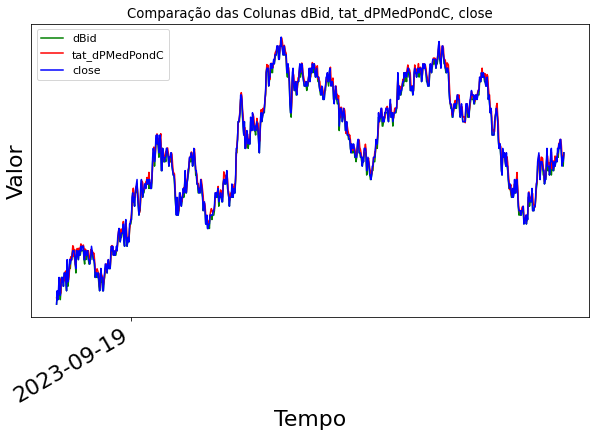

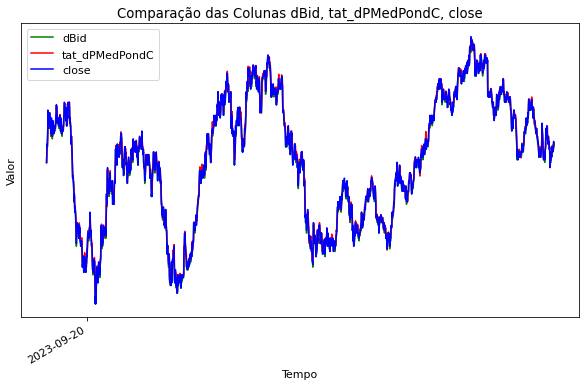

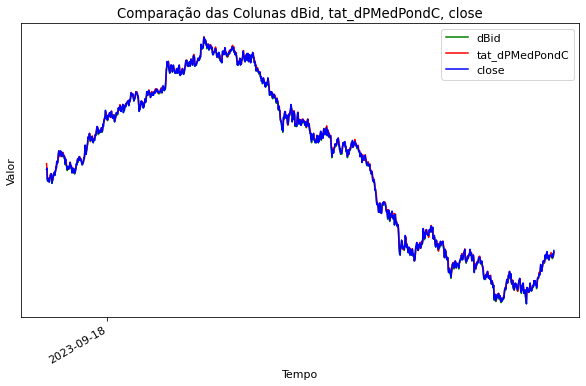

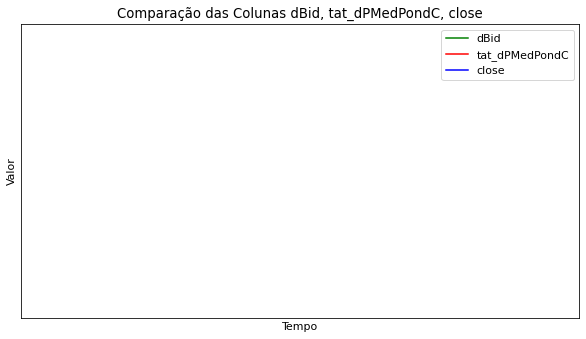

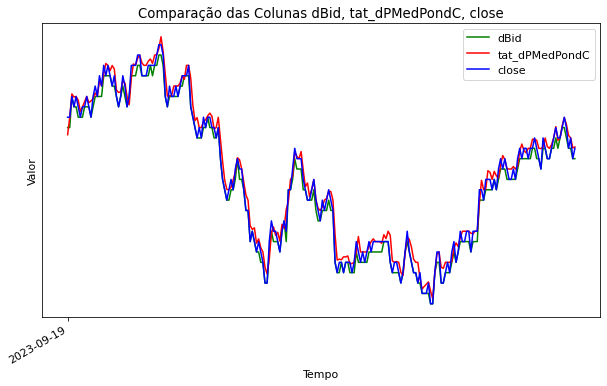

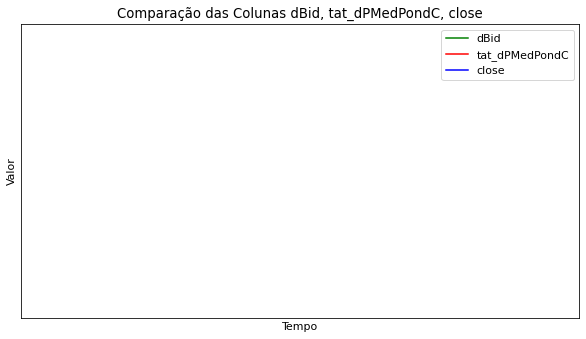

In [14]:
df_final_18 = df_final[(df_final['datetime'] >= '2023-09-18 09:37:00') & (df_final['datetime'] < '2023-09-18 10:02:00')]
df_final_19 = df_final[(df_final['datetime'] >= '2023-09-19 09:53:00') & (df_final['datetime'] < '2023-09-19 10:20:00')]
df_final_20 = df_final[(df_final['datetime'] >= '2023-09-20 10:02:00') & (df_final['datetime'] < '2023-09-20 10:40:00')]
df_final_21 = df_final[(df_final['datetime'] >= '2023-11-06 15:07:00') & (df_final['datetime'] < '2023-11-06 15:10:00')]
df_final_22 = df_final[(df_final['datetime'] >= '2023-09-19 10:37:00') & (df_final['datetime'] < '2023-09-19 10:41:00')]
df_final_23 = df_final[(df_final['datetime'] >= '2023-11-07 10:03:00') & (df_final['datetime'] < '2023-11-07 10:05:00')]

def plot_columns(df, col1, col2, col3):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.rcParams.update({'font.size': 11})
    ax.plot(df['datetime'], df[col1], label=col1, color='green')
    ax.plot(df['datetime'], df[col2], label=col2, color='red')
    ax.plot(df['datetime'], df[col3], label=col3, color='blue')

    ax.set_yticks([])
    ax.set_xticks(ax.get_xticks()[::10])

    plt.title(f'Comparação das Colunas {col1}, {col2}, {col3}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.show()

print("\n")
plot_columns(df_final_19, 'dBid', 'tat_dPMedPondC', 'close')
print("\n")
plot_columns(df_final_20, 'dBid', 'tat_dPMedPondC', 'close')
print("\n")
plot_columns(df_final_18, 'dBid', 'tat_dPMedPondC', 'close')
print("\n")
plot_columns(df_final_21, 'dBid', 'tat_dPMedPondC', 'close')
print("\n")
plot_columns(df_final_22, 'dBid', 'tat_dPMedPondC', 'close')
print("\n")
plot_columns(df_final_23, 'dBid', 'tat_dPMedPondC', 'close')

In [15]:
operations_of_interest = operations_of_interest.rename(columns={'precoClose': 'close'})

In [16]:
def create_y(_df):
    _df['close'] = pd.to_numeric(_df['close'], errors='coerce')

    close = _df['close'].tolist()

    gain = 15
    loss = -10
    decisions = []

    for i, _ in enumerate(close):
        if i == 0:
            y = 0 # Faz nada
        elif (i >= 1):
            difference = close[i] - close[i - 1]

            if (difference) > 0: # Close cresceu
                if (difference) > gain: # Crescimento maior que margem ganho 
                    y = 2 # Compra
                else:
                    y = 0 # Faz nada

            elif (difference) < 0: # Close diminuiu
                if (difference) < loss: # Decréscimo menor que margem perda
                    y = 1 # Vende
                else:
                    y = 0 # Faz nada

            else: # Close se manteve igual
                y = 0 # Faz nada

        decisions.append(y)

    _df['decision'] = decisions
    return _df

In [17]:
df_final_19 = create_y(df_final_19)
df_final_18 = create_y(df_final_18)
df_final_20 = create_y(df_final_20)
df_final_21 = create_y(df_final_21)
df_final_22 = create_y(df_final_22)
df_final_23 = create_y(df_final_23)
operations_of_interest = create_y(operations_of_interest)

C:\Users\Vitor\AppData\Local\Temp/ipykernel_18244/3430966538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['close'] = pd.to_numeric(_df['close'], errors='coerce')
C:\Users\Vitor\AppData\Local\Temp/ipykernel_18244/3430966538.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['decision'] = decisions


In [43]:
df_final2 = pd.concat([df_final_18, df_final_19, df_final_20, df_final_21, df_final_22, df_final_23])

df_final2 = df_final2.drop(columns=['datetime'])
df_final2

,Unnamed: 0,stdDev_buffer_0,iTrades,dDifPrecoCum,dDifVolCum,dVol,iATR_buffer_0,dBid,dAvgDifVolCum,dStdDifVolCum,dAvgDifPrecoCum,dMinDifPrecoCum,dStdTrades,dMinTrades,dMedOfAssDifVolCum,dMedOfMedDifPrecoCum,dMedOfAssDifPrecoCum,tat_iQtdeBuy,tat_iQtdeSell,tat_dSumBalance,tat_dPMedPondC,tat_dPMedPondV,dMedTaTPMedPondC,dMedTaTPMedPondV,dAvgTaTQtdeBuy,dAvgTaTQtdeSell,dAvgTaTSumBalance,dAvgTaTCurtoseQC,dAvgTaTCurtoseQV,dAvgTaTAssimetriaQC,dAvgTaTAssimetriaQV,dAvgTaTPMedPondC,dAvgTaTPMedPondV,dCurTaTPMedPondC,dCurTaTPMedPondV,close,tick_volume,real_volume,ratioPMedPondV,ampco,difAvgTaTAss,tat_iQtdeBalanceAcum,tat_dSumBalanceAcum,ratio_iQtdeSumAcum,norma_p,norma_L_inf,decision
2038,2038,43.517039,158,-25.0,1043.0,61607.0,77.0,120010.0,2097.700000,2157.037914,-2.333333,-25.0,198.559250,118.0,1.991237,-2.5,0.115837,48,324,-804.0,120034.621849,120021.256771,120046.501700,120042.451772,226.533333,399.700000,-497.800000,50.136413,39.970012,6.018436,5.176665,120045.823169,120041.167796,-0.235745,-0.321474,120010.0,18659,61607,1.363651,-75.0,0.841772,-229.0,-628.0,2.742358,721.917934,628.000000,0.0
2039,2039,43.517039,366,5.0,3105.0,64712.0,78.0,120015.0,2156.933333,2159.569895,-2.333333,-25.0,199.281468,118.0,1.991237,-2.5,0.115513,251,758,-990.0,120013.264423,120009.103448,120043.350019,120039.963881,226.833333,420.266667,-544.666667,47.407472,43.443297,5.876372,5.333327,120043.479821,120038.867215,-0.263752,-0.400971,120015.0,19676,64712,1.520256,-70.0,0.543045,-829.0,-1989.0,2.399276,2003.165529,1989.000000,0.0
2040,2040,62.495964,1175,-45.0,15121.0,15125.0,76.0,119970.0,2573.933333,3205.021383,-3.166667,-45.0,259.480314,118.0,1.991237,-2.5,0.098213,610,4251,-12056.0,119988.801325,119990.837019,120040.211058,120036.448526,236.100000,545.966667,-920.466667,53.075556,74.200732,6.137580,6.062731,120040.464435,120036.138462,1.217622,0.528165,119970.0,4883,15125,0.433767,-45.0,0.074849,-4424.0,-13850.0,3.130651,13851.407632,13850.000000,1.0
2041,2041,64.784622,557,-10.0,7863.0,22988.0,78.0,119960.0,2785.900000,3339.286898,-3.666667,-45.0,263.297325,118.0,1.991237,-2.5,0.080049,874,1890,-2964.0,119968.053118,119964.912264,120039.117582,120035.278071,259.200000,601.066667,-1006.900000,60.162261,74.656752,6.441150,6.064828,120036.957152,120032.662190,2.863463,2.976502,119960.0,7881,22988,1.039476,-55.0,0.376321,-5164.0,-16010.0,3.100310,16011.380057,16010.000000,0.0
2042,2042,65.363153,628,0.0,5440.0,28428.0,79.0,119960.0,2884.200000,3373.536295,-3.166667,-45.0,269.937209,118.0,1.991237,-2.5,0.074284,659,887,-418.0,119962.682377,119957.146606,120038.248861,120034.783501,276.500000,609.500000,-974.766667,61.644442,74.383478,6.510488,6.040956,120033.394639,120029.200255,2.298989,2.545222,119960.0,9490,28428,1.107105,-55.0,0.469532,-4885.0,-15438.0,3.160287,15439.347615,15438.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36173,36173,26.766865,57,-5.0,557.0,8515.0,42.0,120045.0,537.866667,575.550575,0.666667,-10.0,22.089916,36.0,2.524855,0.0,0.467205,36,88,-122.0,120051.547085,120046.855072,120040.301303,120036.147584,87.066667,62.166667,105.733333,17.727256,15.414347,3.395278,3.331018,120040.554222,120036.051908,-0.654091,-0.778730,120050.0,2333,8515,1.190552,10.0,0.064260,118.0,436.0,3.694915,438.127886,436.000000,0.0
36174,36174,25.674382,68,-10.0,499.0,9014.0,42.0,120040.0,541.366667,574.964496,0.166667,-10.0,22.131893,36.0,2.525594,0.0,0.467205,38,83,-122.0,120046.223404,120043.080645,120040.716432,120036.370320,86.566667,62.066667,103.233333,17.508995,16.374597,3.353989,3.417271,120040.945676,120036.487930,-0.620713,-0.792397,120040.0,2455,9014,1.276590,0.0,-0.063282,-17.0,90.0,-5.294118,123.109214,103.233333,0.0
36175,36175,26.216896,36,5.0,140.0,9154.0,42.0,120040.0,536.833333,577.658776,0.500000,-10.0,22.465913,36.0,2.528526,0.0,0.467205,15,26,-92.0,120045.000000,120040.000000,120041.28